In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import aquire 
from aquire import get_iris_data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [3]:
df = aquire.get_titanic_data()

In [16]:
# Take a look at the data:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [17]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [28]:
numcols = df.columns[[df[col].dtype != 'object' for col in df.columns]]
numcols

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

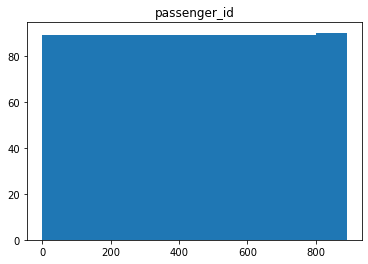

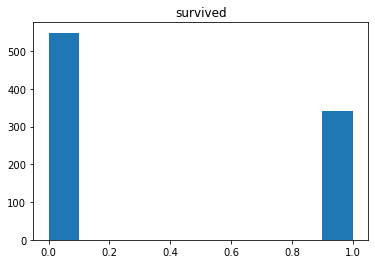

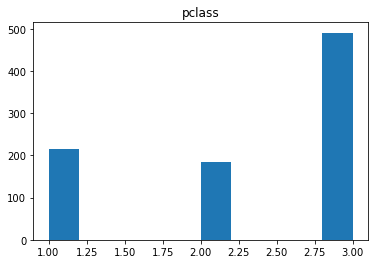

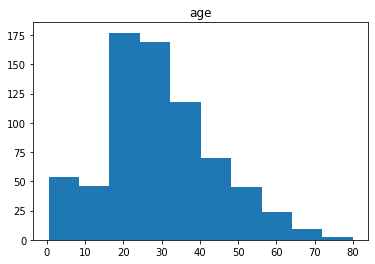

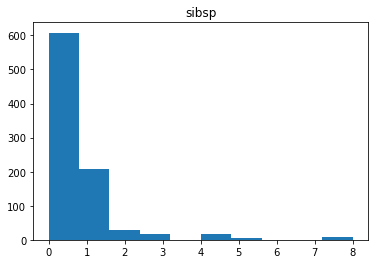

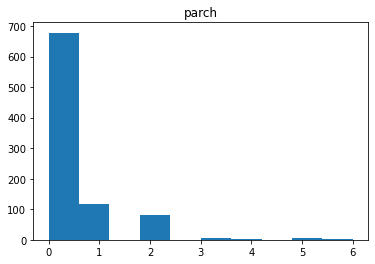

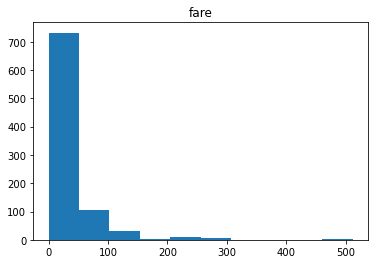

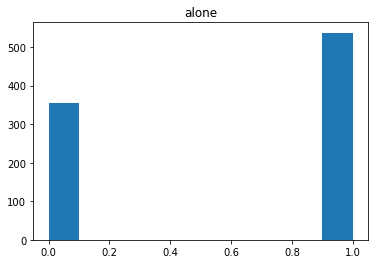

In [29]:
# Plot a distribution for this data 
for col in numcols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [31]:
# gather cat columns 
catcols = df.columns[[df[col].dtype == 'object' for col in df.columns]]
catcols

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [39]:
for col in catcols:
    print(f'For {col} : \n')
    print(df[col].value_counts())
    print(f'\n {df[col].value_counts(normalize = True, dropna = False)}')
    print('-------------------------------------\n')

For sex : 

male      577
female    314
Name: sex, dtype: int64

 male      0.647587
female    0.352413
Name: sex, dtype: float64
-------------------------------------

For embarked : 

S    644
C    168
Q     77
Name: embarked, dtype: int64

 S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
-------------------------------------

For class : 

Third     491
First     216
Second    184
Name: class, dtype: int64

 Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
-------------------------------------

For deck : 

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

 NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
-------------------------------------

For embark_town : 

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

 Southampton  

In [56]:
df['fare'].value_counts(bins = 5, sort = False)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [64]:
# Find what values are missing in the data:
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [65]:
df.shape

(891, 13)

In [66]:
# 1. duplicate columns: remove class and keep pclass, get rid on embarked for embarked_town(embarked is less descriptive)_
# 2. columns with too many nulls: remove age, and remove deck
# 3. fill in missing values from embarked_town
# 4. Encode embarked_town and sex (put in 1 and 0 for values)


In [68]:
# Cleaning the data (Proseritiy and validility in uniqnesss)

# 1. Drop dups
df.drop_duplicates(inplace = True) # The inplace will change or original data set if set to True
#or 
df.drop_duplicates()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [69]:
# 2. Remove dups and columns with too many nulls 
duplicates = ['class', 'embarked']

In [71]:
missing_cols = list(missing[missing > 2].index)

In [73]:
missing_cols

['age', 'deck']

In [74]:
dropcols = missing_cols + duplicates

In [76]:
# concatnate 
df.drop(columns = dropcols, inplace = True)

In [78]:
# 3. Fill in missing calues on embark_town
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [79]:
df['embark_town'] = df ['embark_town'].fillna('Southampton')

In [81]:
# 4. Encode out cat vars that remain as strings or objects
dummies = pd.get_dummies(df[['embark_town', 'sex']], drop_first = True)

In [83]:
# put them back together 
df = pd.concat([df, dummies], axis = 1)

In [85]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,0,3,male,1,0,7.2500,Southampton,0,0,1,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,1,0
3,3,1,1,female,1,0,53.1000,Southampton,0,0,1,0
4,4,0,3,male,0,0,8.0500,Southampton,1,0,1,1


In [95]:
# Finally put all in one function (Work on this)
def clean_titanic():
    '''
    clean_titanic will take a dataframe acquired as df and remove columns that are: 
    dups,
    have too many values,
    and will fill in smaller amounts of nulls in embark_town,
    encode sex and embark_town columns
    '''
    df.drop_duplicates(inplace = True)
    dropcols = ['age', 'deck', 'class', 'embarked']
    df.drop(columns = dropcols, inplace = True)
    df['embark_town'] = df ['embark_town'].fillna('Southampton')
    dummies = pd.get_dummies(df[['embark_town', 'sex']], drop_first = True)
    return pd.concat([df, dummies], axis = 1)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [96]:
# Train, validate, and spit. ( 2 splits, first split = 25%, second split = 56%)
train_validate, test = train_test_split(df, test_size = 0.2, random_state = 1349)

In [100]:
train, validate = train_test_split(train_validate, train_size = 0.7, random_state = 1349) 

In [101]:
# Use sklearn to fit the data
imputer = SimpleImputer(strategy = 'most_frequent')

In [102]:
imputer = imputer.fit(train[['embark_town']])

In [104]:
# Traansform everthing with train, validate, test
train [['embark_town']] = imputer.transform(train[['embark_town']])

validate [['embark_town']] = imputer.transform(validate[['embark_town']])

test [['embark_town']] = imputer.transform(test[['embark_town']])

In [105]:
def impute_mode():
    '''
    impute mode for embark_town
    '''
    imputer = SimpleImputer(strategy = 'most_frequent')
    train [['embark_town']] = imputer.transform(train[['embark_town']])
    validate [['embark_town']] = imputer.transform(validate[['embark_town']])
    test [['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

In [283]:
def prep_titanic_data():
    df = clean_titanic()
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    train, validate, test = impute_mode()
    return train, validate, test

In [107]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [2]:
# Exerceises 
# Use the function defined in acquire.py to load the iris data.
df = get_iris_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Drop the species_id and measurement_id columns.
dropcols = ['species_id', 'measurement_id']
df.drop(columns = dropcols, inplace = True)

KeyError: "['measurement_id'] not found in axis"

In [8]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [9]:
# Rename the species_name column to just species.
df.rename(columns = {'species_name':'species'}, inplace = True)

In [10]:
df.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [12]:
# Create dummy variables of the species name.
dummies = pd.get_dummies(df[['species']], drop_first = True)

In [14]:
dummies.head() 

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
df = pd.concat([df, dummies], axis = 1)

In [16]:
df.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,1,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,1,setosa,4.7,3.2,1.3,0.2,0,0
3,1,setosa,4.6,3.1,1.5,0.2,0,0
4,1,setosa,5.0,3.6,1.4,0.2,0,0


In [3]:
# Create a clean function (add df to arg. to use original dataframe)
def clean_iris(df):
    '''
    clean_iris will take in one arg. df a pandas dataframe, anticipated to be the iris dataset
    and will remove species_id and measurement_id columns,
    rename species_name to species
    encode species into two new columns
    
    return a single pandas dataframe with the above operations preformed
    '''
    dropcols = ['species_id', 'measurement_id']
    df.drop(columns = dropcols, inplace = True)
    df.rename(columns = {'species_name':'species'}, inplace = True)
    dummies = pd.get_dummies(df[['species']], drop_first = True)
    return pd.concat([df, dummies], axis = 1)

In [4]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied. 
def prep_iris(df):
    '''
    prep_iris will take one arg. df, a pandas dataframe, anticipated to be the iris dataset 
    and will remove species_id and measurement_id columns,
    rename species_name to species
    encode species into two new columns
    
    preform a train, validate, and test split
    
    return three pandas dataframes, train, validate, test
    '''
    df = clean_iris(df)
    # test 
    train_validate, test = train_test_split(df, test_size = 0.2, random_state= 1349, stratify = df.species)
    # train and validate
    train, validate = train_test_split(train_validate, train_size=.70, random_state=1349, stratify=train_validate.species)
    return train, validate, test

In [11]:
from prepare import clean_iris
from prepare import prep_iris

In [12]:
train, validate, test = prepare.prep_iris(df)

NameError: name 'prepare' is not defined

In [13]:
train.head()

NameError: name 'train' is not defined